# 7. Redes Neurais Convolucionais (Convolutional Neural Networks (CNNs))

Dados de imagem são representados como uma grade bidimensional de pixels, seja a imagem monocromática ou colorida. Consequentemente, cada pixel corresponde a um ou múltiplos valores numéricos, respectivamente. Até agora, ignoramos essa rica estrutura e tratamos imagens como vetores de números, achatando- as , independentemente da relação espacial entre pixels. Essa abordagem profundamente insatisfatória era necessária para alimentar os vetores unidimensionais resultantes por meio de um MLP totalmente conectado.

Arquiteturas baseadas em CNN são agora onipresentes no campo da visão computacional. Por exemplo, na coleção Imagnet ( Deng et al. , 2009 ), foi apenas o uso de redes neurais convolucionais, em resumo Convnets, que forneceu melhorias significativas de desempenho ( Krizhevsky et al. , 2012 ) .

As CNNs modernas, como são chamadas coloquialmente, devem seu design a inspirações da biologia, teoria de grupos e uma boa dose de ajustes experimentais. Além de sua eficiência de amostra na obtenção de modelos precisos, as CNNs tendem a ser computacionalmente eficientes, tanto porque exigem menos parâmetros do que arquiteturas totalmente conectadas quanto porque as convoluções são fáceis de paralelizar entre núcleos de GPU ( Chetlur et al. , 2014 ) .

__Consequentemente, os profissionais geralmente aplicam CNNs sempre que possível, e cada vez mais elas surgiram como concorrentes confiáveis, mesmo em tarefas com uma estrutura de sequência unidimensional, como áudio ( Abdel-Hamid et al. , 2014 ) , texto ( Kalchbrenner et al. , 2014 ) e análise de séries temporais ( LeCun et al. , 1995 ) , onde redes neurais recorrentes são convencionalmente usadas.__





# 7.1. De Camadas Totalmente Conectadas a Convoluções



Até hoje, os modelos que discutimos até agora continuam sendo opções apropriadas quando lidamos com dados tabulares. Por tabular, queremos dizer que os dados consistem em linhas correspondentes a exemplos e colunas correspondentes a recursos. Com dados tabulares, podemos antecipar que os padrões que buscamos podem envolver interações entre os recursos, mas não assumimos nenhuma estrutura a priori sobre como os recursos interagem.

# 7.1.1. Invariância

Agora podemos tornar essas intuições mais concretas enumerando alguns desideratos para orientar nosso projeto de uma arquitetura de rede neural adequada para visão computacional:

- 1. Nas primeiras camadas, nossa rede deve responder similarmente ao mesmo patch, independentemente de onde ele apareça na imagem. Esse princípio é chamado de invariância de tradução (ou equivariância de tradução ).

- 2. As primeiras camadas da rede devem focar em regiões locais, sem considerar o conteúdo da imagem em regiões distantes. Este é o princípio da localidade . Eventualmente, essas representações locais podem ser agregadas para fazer previsões em todo o nível da imagem.

- 3. À medida que avançamos, camadas mais profundas devem ser capazes de capturar características de maior alcance da imagem, de forma semelhante à visão de nível superior na natureza.

Vamos ver como isso se traduz em matemática.

# 7.1.2. Restringindo o MLP

Para começar, podemos considerar um MLP com:

- Entradas: imagens bidimensionais X;
- Representações ocultas imediatas H.

Deixar [X]i,j e [H]i,j denota o pixel na localização (i,j) na imagem de entrada e na representação oculta, respectivamente.

- Matrizes W: representados como tensores de peso de quarta ordem.
- Matriz biases b: representada por U.

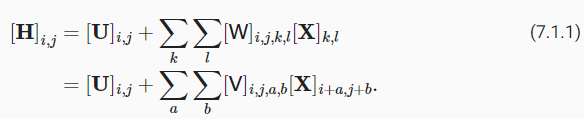

Mudança de W para V. \
Reindexamos os sufixos: 

k = i + a \
l = j + b

Em outras palavras:

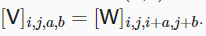

Os índices a e b realizam deslocamentos positivos e negativos, cobrindo a imagem inteira.

Para qualquer local dado (i,j) na representação oculta [H]i,j, calculamos seu valor somando os pixels em x, centrado em torno (i,j) e ponderado por [V]i,j,a,b

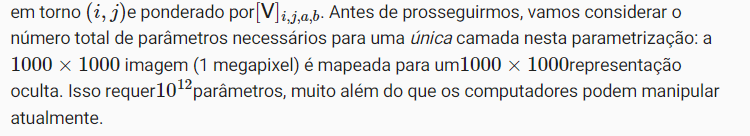

# 7.1.2.1. Invariância de tradução

Isso implica que uma mudança na entrada X deveria simplesmente levar a uma mudança na representação oculta H.

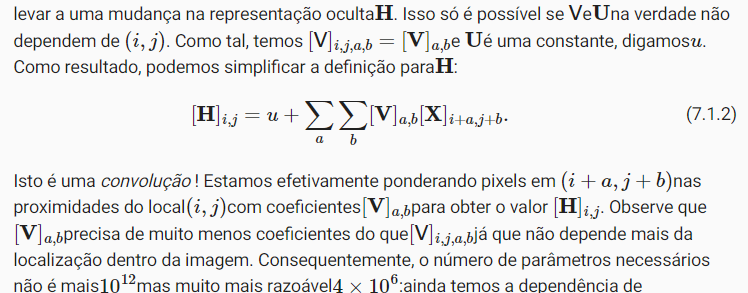



# 7.1.2.2. Localidade

Acreditamos que não deveríamos ter que olhar muito longe da localização (i,j) a fim de obter informações relevantes para avaliar o que está acontecendo com [H]i,j.

Logo, a e b devem estar dentro de um intervalo [-delta,+delta].

Camada convolucional:

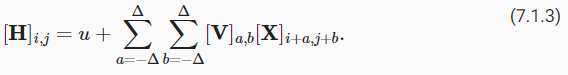



Redes neurais convolucionais (CNNs) são uma família especial de redes neurais que contêm camadas convolucionais. 

Na comunidade de pesquisa de aprendizado profundo, V é chamado de kernel de convolução , filtro ou simplesmente pesos da camada que são parâmetros aprendíveis.

Embora anteriormente pudéssemos ter exigido bilhões de parâmetros para representar apenas uma única camada em uma rede de processamento de imagens, agora normalmente precisamos de apenas algumas centenas, sem alterar a dimensionalidade das entradas ou das representações ocultas. 

Todo aprendizado depende da imposição de viés indutivo.

Essa redução drástica nos parâmetros nos leva ao nosso último desiderato, a saber, que camadas mais profundas devem representar aspectos maiores e mais complexos de uma imagem. Isso pode ser alcançado intercalando não linearidades e camadas convolucionais repetidamente.



# 7.1.3. Convoluções

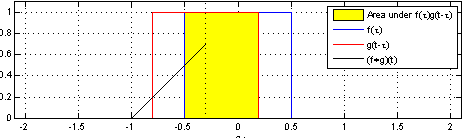

Convolução:

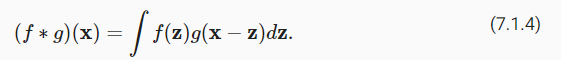


Para objetos discretos:

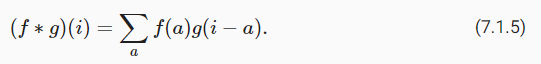


Para tensores bidimensionais:

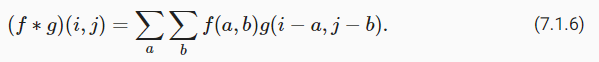

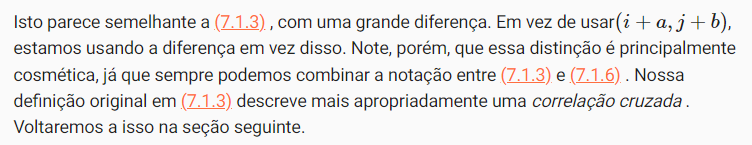

# 7.1.4. Canais


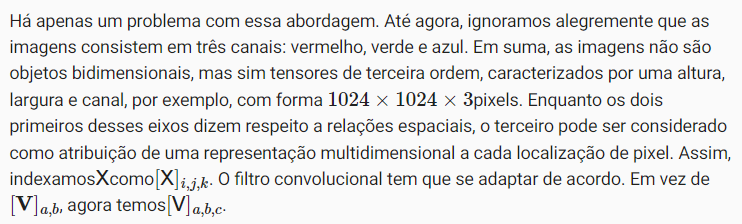

Os tensores X e H agora são de terceira ordem.

Poderíamos pensar nas representações ocultas como compreendendo uma série de grades bidimensionais empilhadas umas sobre as outras. Como nas entradas, elas são às vezes chamadas de canais . Às vezes, também são chamadas de mapas de recursos , pois cada uma fornece um conjunto espacializado de recursos aprendidos para a camada subsequente. Intuitivamente, você pode imaginar que em camadas mais baixas, mais próximas das entradas, alguns canais podem se tornar especializados para reconhecer bordas, enquanto outros podem reconhecer texturas.

Camada convolucional para múltiplos canais:

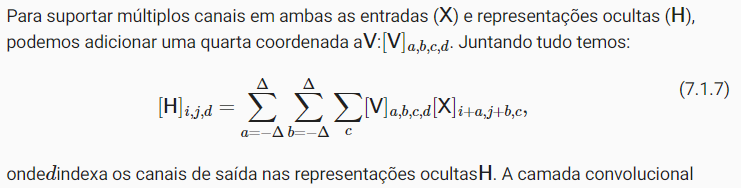



# 7.1.5. Resumo e Discussão

Princípios:

- Invariância de tradução em imagens implica que todos os patches de uma imagem serão tratados da mesma maneira.
- Localidade significa que apenas uma pequena vizinhança de pixels será usada para calcular as representações ocultas correspondentes (H).
- Reduzir o número de parâmetros em uma classe de função sem limitar seu poder expressivo. Vimos uma redução drástica de complexidade como resultado dessa restrição, transformando problemas computacionalmente e estatisticamente inviáveis em modelos tratáveis.
- Adicionar canais nos permitiu trazer de volta parte da complexidade que foi perdida devido às restrições impostas ao kernel convolucional pela localidade e invariância de tradução. Observe que é bastante natural adicionar canais além de vermelho, verde e azul.

Muitas imagens de satélite, em particular para agricultura e meteorologia, têm dezenas a centenas de canais, gerando imagens hiperespectrais em vez disso. Elas relatam dados em muitos comprimentos de onda diferentes. 

A seguir, veremos como usar convoluções efetivamente para manipular a dimensionalidade das imagens em que operam, como mover de representações baseadas em localização para baseadas em canal e como lidar com um grande número de categorias de forma eficiente.

# 7.1.6. Exercícios

# Ex. 2 Audio data is often represented as a one-dimensional sequence.
# - When might you want to impose locality and translation invariance for audio?
# - Derive the convolution operations for audio.
# - Can you treat audio using the same tools as computer vision? Hint: use the spectrogram.



# 2.1 When might you want to impose locality and translation invariance for audio?

- Speech Recognition: Locally relevant features, such as phonemes and syllables, repeat across different positions in spoken sentences. Translation invariance ensures that the same patterns are detected regardless of their position in the audio sequence.

- Audio Classification: Locality helps in capturing short-term audio events like musical notes or sound effects. Translation invariance ensures that the classifier can recognize these events regardless of their timing within the audio.

# 2.2 Derive the convolution operations for audio.

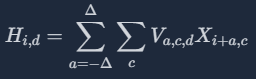

# Ex. 2.3 Can you treat audio using the same tools as computer vision? Hint: use the spectrogram.

While audio and images are different, there are certain techniques that can be applied to audio using similar principles as in computer vision. One such technique is the spectrogram. A spectrogram is a visual representation of the spectrum of frequencies in a signal as they vary with time. It’s akin to an image where the x-axis represents time, the y-axis represents frequency, and the color/intensity represents the amplitude or energy.

To create a spectrogram, you can follow these steps:

- Divide the audio signal into short segments: These segments are typically called frames. This accounts for the temporal locality.

- Apply the Fourier Transform to each frame: This converts the signal from the time domain to the frequency domain.

- Stack the results: Each frame’s spectrum becomes a column, creating a 2D matrix (similar to an image).

- Apply convolution: Now, you can apply convolution operations, similar to how you would with images. This can help in tasks like feature extraction and pattern recognition in the spectrogram representation.

In this way, the spectrogram enables you to extract and analyze local patterns in audio data, just as you would with images in computer vision. However, note that due to the nature of audio (sequential and 1D), some adaptations and considerations might be needed when applying these tools.

# 3. Why might translation invariance not be a good idea after all? Give an example.

While translation invariance is a useful property in many contexts, there are cases where it might not be appropriate or might even be undesirable. One such example is in the field of music analysis.

In music, the timing and temporal relationships between different musical events (such as notes, chords, and rhythm) are crucial for understanding the structure and meaning of a piece. Applying translation invariance to music data could lead to the loss of this timing information, making it difficult to accurately analyze and interpret the music.

Consider the scenario of music transcription, where the goal is to convert an audio recording of music into a symbolic representation of the notes being played. If translation invariance were applied indiscriminately, the relative timing of notes could be lost, leading to inaccurate transcriptions. The same melody played at different timings in a piece might be treated as identical, which is not the desired outcome.

For instance, imagine a simple piece of music where a short melody is repeated at different time positions. If translation invariance is applied without considering the temporal context, the algorithm might recognize each occurrence of the melody as the same pattern, even though the actual notes occur at different moments in the music. This would lead to an incorrect transcription that doesn’t capture the musical structure and timing accurately.

In such cases, it’s essential to preserve the temporal information and not enforce translation invariance across the entire piece. Instead, techniques that take into account the temporal relationships and musical context, such as dynamic programming algorithms or Hidden Markov Models, might be more suitable for tasks like music transcription.

This example demonstrates that while translation invariance is powerful and valuable in many domains, it’s essential to consider the specific characteristics and requirements of the data and the task at hand. In some cases, maintaining the sensitivity to translation (temporal) changes is crucial for accurate analysis and interpretation.

# Outras respostas:

https://pandalab.me/archives/from_fully_connected_layers_to_convolutions

# Referências:

https://www.youtube.com/watch?v=KuXjwB4LzSA

https://www.3blue1brown.com/#lessons

